### Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

## Загружаем картинку

In [10]:
img = imageio.imread('foto.jpg')
img = img.astype(np.float32) / 255.
print(img.shape)

(1703, 2560, 3)


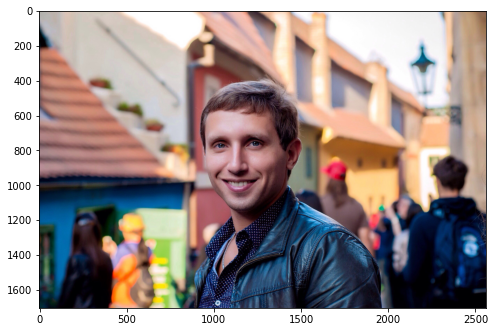

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [12]:
import scipy.signal

### Линейное увеличение яркости цветного изображения

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


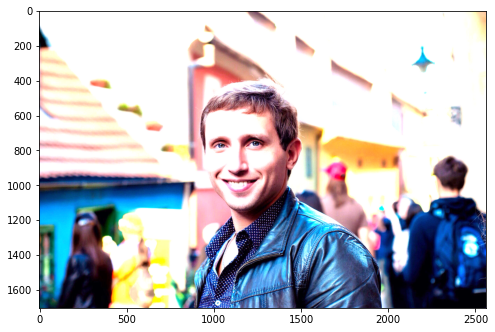

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(img*2)

### Нелинейное увеличение яркости

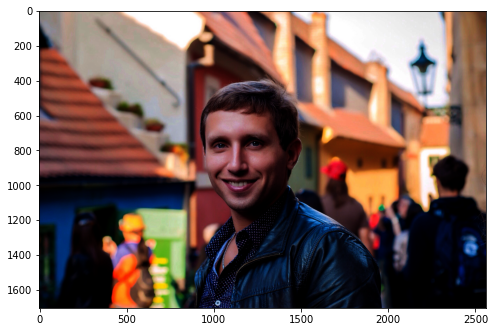

In [15]:
plt.figure(figsize=(8, 8))
plt.imshow(img**2) # возведение в квадрат

### Переходим в пространство HSV

In [17]:
from skimage.color import rgb2hsv, hsv2rgb

In [18]:
img_hsv = rgb2hsv(img)

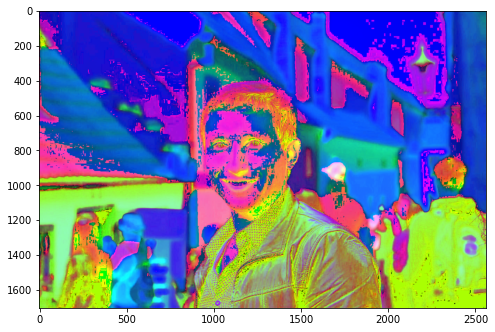

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

### Линейное уменьшение насыщенности

In [20]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 2
img_new = hsv2rgb(img_hsv_new)

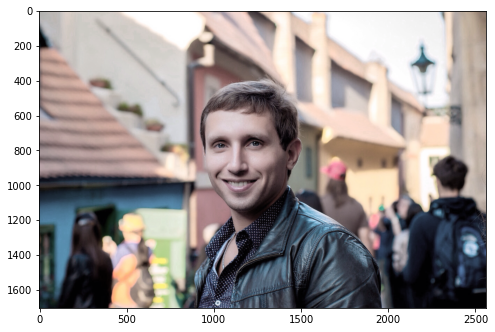

In [21]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

### Изменение тона

In [23]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] /= 2
img_new = hsv2rgb(img_hsv_new)

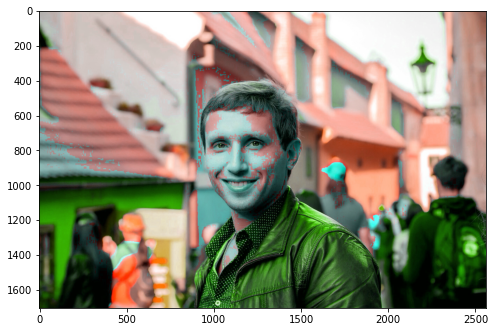

In [24]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

### Бинаризация по порогу

In [25]:
img = imageio.imread('foto.jpg')
img = img.astype(np.float32) / 255.

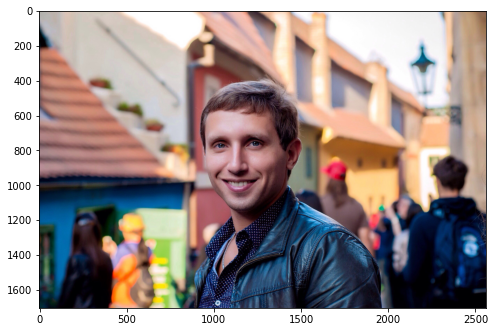

In [26]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [27]:
threshold = 0.45 # порог бинаризации
img_bw = np.mean(img, axis=2)
img_bin = (img_bw > threshold).astype(np.uint8)

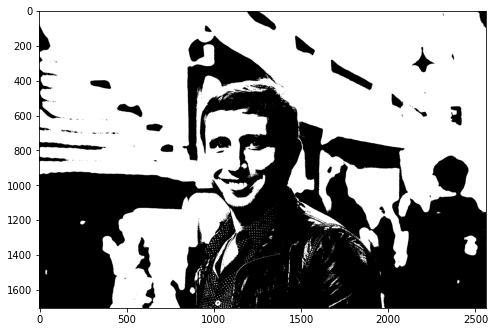

In [28]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bin*255, cmap='gray')

### Оконная обработка Box Blue

In [29]:
def my_filter(x):
    # Box blur
    return np.mean(x)

In [30]:
win_size = (11, 11) # размер окна

out_img = np.zeros(
    (img.shape[0] - win_size[0] + 1,
     img.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = my_filter(x)

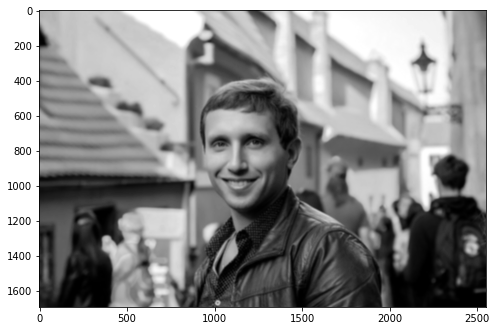

In [31]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')

### Свёртка через библиотеку scipy.signal

In [41]:
import scipy.signal

In [45]:
img = imageio.imread('foto.jpg')
img = img.astype(np.float32) / 255.
print(img.shape)

(1703, 2560, 3)


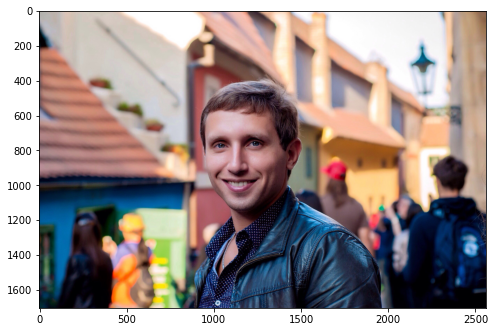

In [46]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [47]:
out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


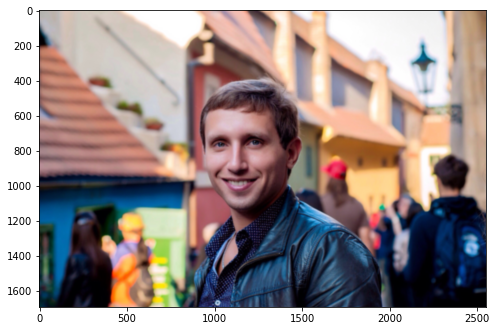

In [48]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)